In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Load in csv
college_data = ("Scorecard Data.csv")
university_df = pd.read_csv(college_data)
reduced_university_df =university_df[["UNITID","INSTNM","CITY", "STABBR","MN_EARN_WNE_P6","MN_EARN_WNE_P10","ADM_RATE",
                                    "ADM_RATE_ALL"]]
reduced_university_df = reduced_university_df.rename(
   columns={"UNITID":"University ID","INSTNM":"University Name", "CITY":"City","STABBR":"State",
                            
            "MN_EARN_WNE_P6":"Mean Earnings Six","MN_EARN_WNE_P10":"Mean Earnings Ten", "ADM_RATE": "Admission Rate", "ADM_RATE_ALL": "All Admission Rates"})
reduced_university_df.head(5)

,University ID,University Name,City,State,Mean Earnings Six,Mean Earnings Ten,Admission Rate,All Admission Rates
0,100654.0,Alabama A & M University,Normal,AL,28400,35500,0.9027,0.902671
1,100663.0,University of Alabama at Birmingham,Birmingham,AL,39400,48400,0.9181,0.918068
2,100690.0,Amridge University,Montgomery,AL,35400,47600,NaN,NaN
3,100706.0,University of Alabama in Huntsville,Huntsville,AL,40300,52000,0.8123,0.812304
4,100724.0,Alabama State University,Montgomery,AL,24400,30600,0.9787,0.978661


In [2]:
#Install stats
!pip install stats

In [3]:
# Dependencies
from stats import mean, median, mode

In [4]:
reduced_university_df.dropna(axis ='rows', inplace=True)

In [5]:
row_indices_tofilter = []
for column in reduced_university_df:
   row_indices_tofilter.append(reduced_university_df[reduced_university_df[column].astype(str).str.strip()=="PrivacySuppressed"].index.tolist())
#     df[df['BoolCol'] == True].index.tolist()
new_list = []
for i in row_indices_tofilter:
   for j in i:
       new_list.append(j)
len(new_list)
filtering_set = set(new_list)
len(filtering_set)
filtering_list = list(filtering_set)
filtering_list
Data_filtered_df=reduced_university_df.drop(filtering_list)
Data_filtered_df
# Data_filtered_df
Data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 6351
Data columns (total 8 columns):
University ID          1774 non-null float64
University Name        1774 non-null object
City                   1774 non-null object
State                  1774 non-null object
Mean Earnings Six      1774 non-null object
Mean Earnings Ten      1774 non-null object
Admission Rate         1774 non-null float64
All Admission Rates    1774 non-null float64
dtypes: float64(3), object(5)
memory usage: 124.7+ KB


In [6]:
Data_filtered_df.head()

,University ID,University Name,City,State,Mean Earnings Six,Mean Earnings Ten,Admission Rate,All Admission Rates
0,100654.0,Alabama A & M University,Normal,AL,28400,35500,0.9027,0.902671
1,100663.0,University of Alabama at Birmingham,Birmingham,AL,39400,48400,0.9181,0.918068
3,100706.0,University of Alabama in Huntsville,Huntsville,AL,40300,52000,0.8123,0.812304
4,100724.0,Alabama State University,Montgomery,AL,24400,30600,0.9787,0.978661
5,100751.0,The University of Alabama,Tuscaloosa,AL,42400,51600,0.5330,0.532954


In [48]:
# Create the bins in which Data will be held
# Bins are 0, 25.0, 50.0, 75.0, 100.0 
bins = [0, 25.0, 50.0, 75.0, 100.0]
group_names = ["<25%", "25-50%", "50-75%", ">75%"]

Data_filtered_df['new_admission'] = pd.cut(Data_filtered_df["All Admission Rates"], bins, labels=group_names)

Data_filtered_df.head()


,University ID,University Name,City,State,Mean Earnings Six,Mean Earnings Ten,Admission Rate,All Admission Rates,new_admission
0,100654.0,Alabama A & M University,Normal,AL,28400,35500,0.9027,0.902671,<25%
1,100663.0,University of Alabama at Birmingham,Birmingham,AL,39400,48400,0.9181,0.918068,<25%
3,100706.0,University of Alabama in Huntsville,Huntsville,AL,40300,52000,0.8123,0.812304,<25%
4,100724.0,Alabama State University,Montgomery,AL,24400,30600,0.9787,0.978661,<25%
5,100751.0,The University of Alabama,Tuscaloosa,AL,42400,51600,0.5330,0.532954,<25%


In [49]:
print(bins)

[0, 25.0, 50.0, 75.0, 100.0]


In [50]:
Data_filtered_df.dtypes

University ID           float64
University Name          object
City                     object
State                    object
Mean Earnings Six        object
Mean Earnings Ten        object
Admission Rate          float64
All Admission Rates     float64
new_admission          category
dtype: object

In [51]:
r = pd.DataFrame(Data_filtered_df["Mean Earnings Six"].astype(str).astype(int))
# Data_filtered_df.dtypes
r.head()

,Mean Earnings Six
0,28400
1,39400
3,40300
4,24400
5,42400


In [52]:
r.dtypes

Mean Earnings Six    int64
dtype: object

In [53]:
# df.to_csv('example.csv')
Data_filtered_df.to_csv('FilterMe.csv')


In [54]:
#Create Bins for earnings
# Bins are 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100   
bins_two = [0, 10000, 25000, 50000, 75000, 100000, 10000000 ]
group_names_two = ["10K", "25K", "50K", "75K", "100K", "100k-1M"]


r["six_year_earnings"] = pd.cut(r["Mean Earnings Six"], bins_two, labels=group_names_two)

r.head()

,Mean Earnings Six,six_year_earnings
0,28400,50K
1,39400,50K
3,40300,50K
4,24400,25K
5,42400,50K


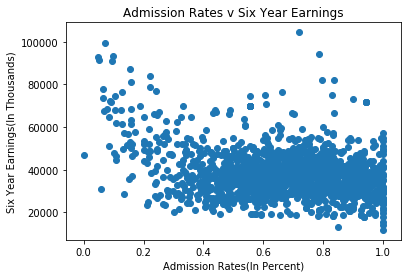

In [63]:
# Create a title, x label, and y label for our chart
plt.title("Admission Rates v Six Year Earnings")
plt.xlabel("Admission Rates(In Percent)")
plt.ylabel("Six Year Earnings(In Thousands)")





plt.scatter(Data_filtered_df['All Admission Rates'], r['Mean Earnings Six'])
#plt.show()
plt.savefig('AdmissionvEarnings6.png', bbox_inches='tight')

In [22]:
p = pd.DataFrame(Data_filtered_df["Mean Earnings Ten"].astype(str).astype(int))
# Data_filtered_df.dtypes
p.head()

,Mean Earnings Ten
0,35500
1,48400
3,52000
4,30600
5,51600


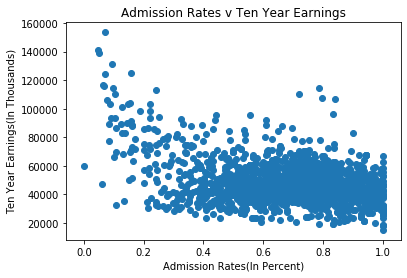

In [62]:
# Create a title, x label, and y label for our chart
plt.title("Admission Rates v Ten Year Earnings")
plt.xlabel("Admission Rates(In Percent)")
plt.ylabel("Ten Year Earnings(In Thousands)")









plt.scatter(Data_filtered_df['All Admission Rates'], p['Mean Earnings Ten'])
#plt.show()
plt.savefig('AdmissionvEarnings10.png', bbox_inches='tight')

In [ ]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("Desktop/Analysis6.png")
plt.show()